<a href="https://colab.research.google.com/github/wbfrench1/Intro_to_Stats_w_Python/blob/main/src/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# Basic Plots

## Create Single Plot

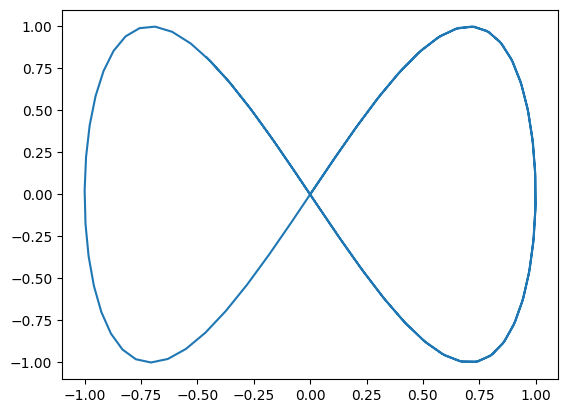

In [2]:
t = np.arange(0,10,0.1)

x = np.sin(t)
y = np.sin(2*t)

vx = np.cos(t)
vy = 2*np.cos(2*t)

fig, ax = plt.subplots()
ax.plot(x, y)

## Create 2 Subplots

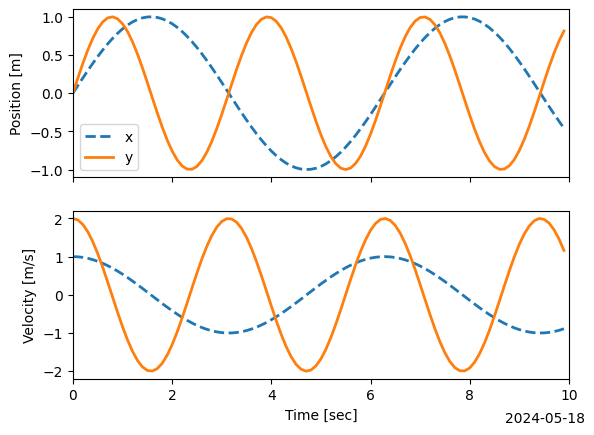

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=1,
                       sharex= True)

axs[0].plot(t, np.column_stack([x,y]), linewidth=2)
axs[1].plot(t, np.column_stack([vx,vy]), lw=2)

axs[0].set(ylabel='Position [m]')
axs[1].set(xlabel='Time [sec]', ylabel='Velocity [m/s]')

axs[0].set_xlim([0,10])

fig.text(0.8, 0.02, date.isoformat(datetime.date(year=2024, month=5, day=18)))

for ax in axs:
    lines = ax.get_lines()
    lines[0].set_linestyle('--')

axs[0].legend(['x','y'])
out_file= 'simple_figure.jpg'
plt.savefig(out_file, dpi=200)

# Plots of Data with one Variable

<function matplotlib.pyplot.show(close=None, block=None)>

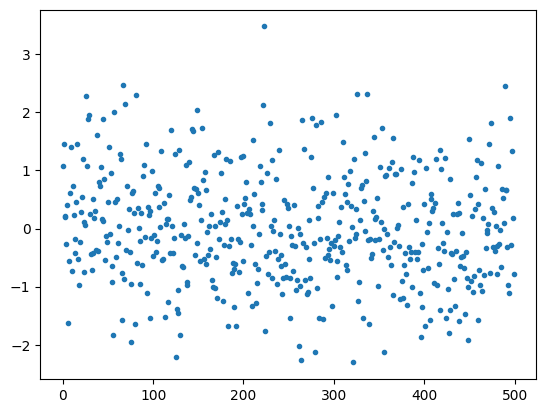

In [62]:
x= np.random.randn(500)

plt.plot(x, '.')
plt.show

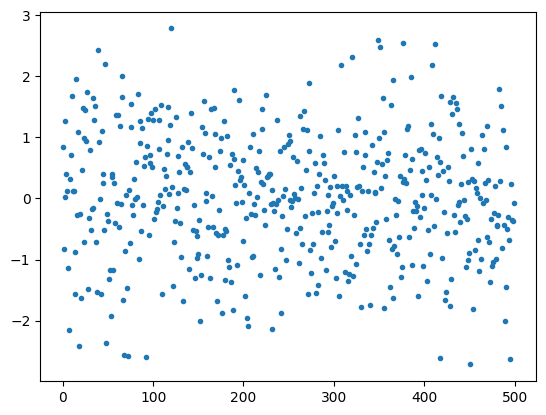

In [44]:
fig, axs= plt.subplots(1,1)
axs.plot(x,'.')

(array([ 6.,  2.,  3.,  6., 12., 16., 19., 27., 22., 29., 36., 45., 53.,
        42., 37., 33., 24., 28., 19., 21.,  6.,  4.,  4.,  4.,  2.]),
 array([-2.71938365, -2.49918608, -2.27898851, -2.05879094, -1.83859337,
        -1.6183958 , -1.39819822, -1.17800065, -0.95780308, -0.73760551,
        -0.51740794, -0.29721037, -0.0770128 ,  0.14318477,  0.36338234,
         0.58357991,  0.80377748,  1.02397505,  1.24417262,  1.46437019,
         1.68456776,  1.90476533,  2.12496291,  2.34516048,  2.56535805,
         2.78555562]),
 <BarContainer object of 25 artists>)

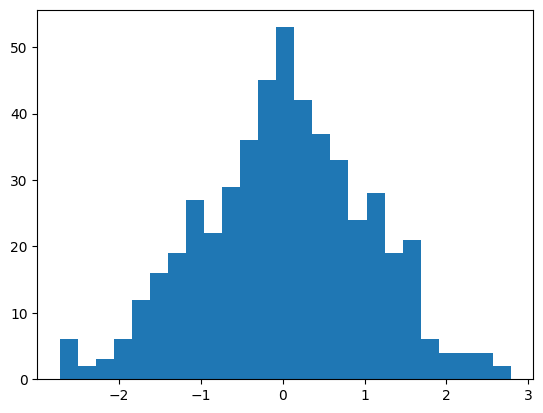

In [45]:
plt.hist(x, bins=25, density=False)

Text(0.5, 1.0, 'Density Histogram, 25 bins')

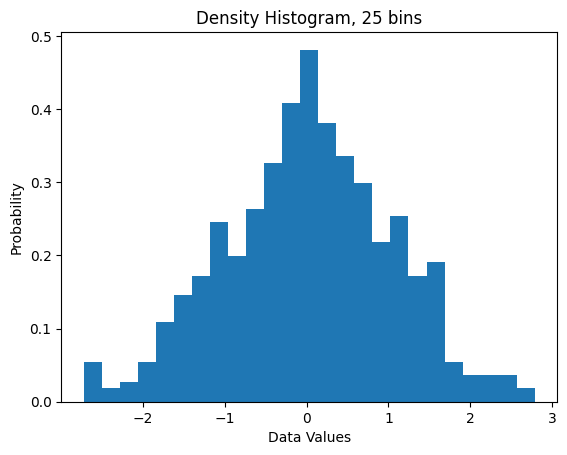

In [46]:
fig, ax= plt.subplots(1)
ax.hist(x, bins=25, density=True)
ax.set_xlabel('Data Values')
ax.set_ylabel('Probability')
ax.set_title('Density Histogram, 25 bins')

## Kernal-Density-Estimation (KDE) Plots

In [47]:
#x= [-2.1, -1.3, -0.4, 1.9, 5.1, 6.2]

<Axes: ylabel='Density'>

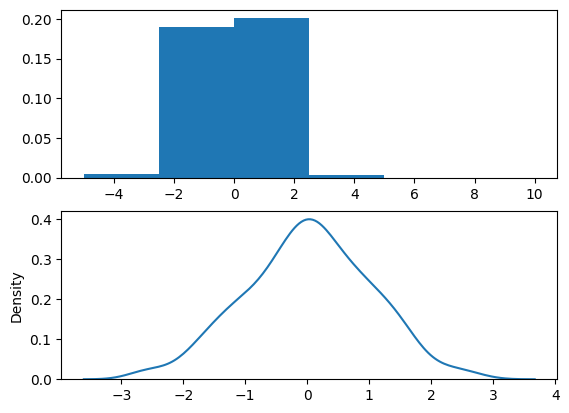

In [48]:
fig, ax= plt.subplots(nrows=2, ncols=1)
ax[0].hist(x, bins=6, density=True, range=[-5,10], rwidth=2)
sns.kdeplot(x)

## Cumulative Frequency

In [49]:
values

array([-2.27291667, -1.91267361, -1.55243056, -1.1921875 , -0.83194444,
       -0.47170139, -0.11145833,  0.24878472,  0.60902778,  0.96927083,
        1.32951389,  1.68975694,  2.05      ,  2.41024306,  2.77048611,
        3.13072917,  3.49097222,  3.85121528,  4.21145833,  4.57170139,
        4.93194444,  5.2921875 ,  5.65243056,  6.01267361,  6.37291667])

Text(0.5, 1.0, 'Cumulative Distribution Function')

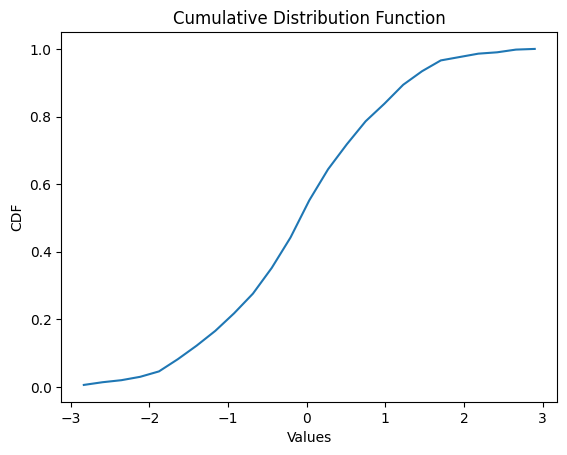

In [50]:
n_bins= 25

res= stats.cumfreq(x, numbins=n_bins)
lower_lim= res.lowerlimit
upper_lim= res.lowerlimit + n_bins*res.binsize
values= np.linspace(lower_lim, upper_lim, n_bins)
cdf= res.cumcount / len(x)

fig, ax= plt.subplots(1)

ax.plot(values, cdf)
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function')

In [52]:
rng= np.random.default_rng()
x= [1, 4, 2, 1, 3, 1]
res= stats.cumfreq(x, numbins=4, defaultreallimits= (1.5, 5))
res.cumcount
res.extrapoints

3

## Error Bars

Text(1.05, 89, '89')

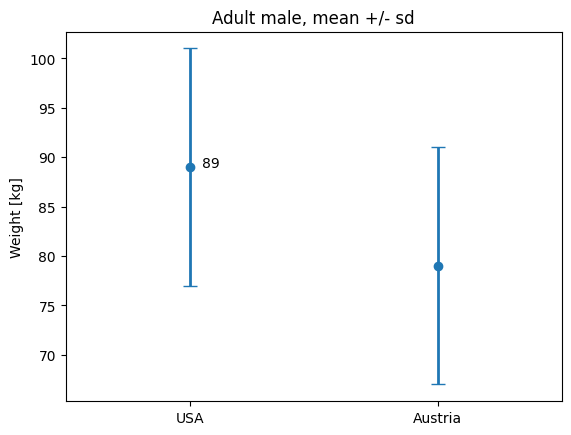

In [53]:
weight= {'USA' : 89, 'Austria' : 79}
sd_male= 12
plt.errorbar( x= [1,2], y= weight.values(),
             yerr=sd_male * np.r_[1,1],
              capsize=5, lw= 0,
              elinewidth= 2, marker= 'o')
plt.xlim([0.5, 2.5])
plt.xticks([1, 2], weight.keys())
plt.ylabel('Weight [kg]')
plt.title('Adult male, mean +/- sd')
plt.annotate(89, (1.05,89),)

## Boxplots

500


{'whiskers': [<matplotlib.lines.Line2D at 0x79ac6fe70b80>,
 'caps': [<matplotlib.lines.Line2D at 0x79ac6fe72740>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ac6fe72080>],
 'medians': [<matplotlib.lines.Line2D at 0x79ac6fe72c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ac6fe72f20>],
 'means': []}

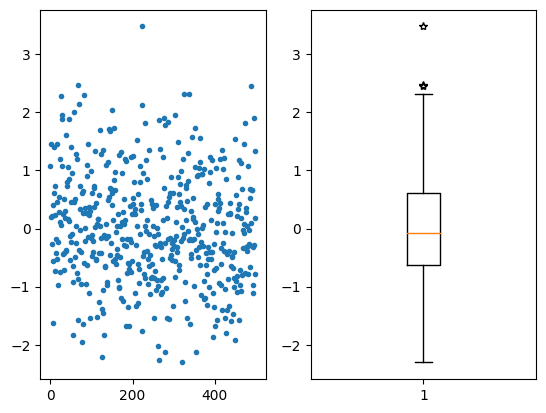

In [63]:
print(len(x))
fig, ax = plt.subplots(1,2)
ax[0].plot(x, '.')
ax[1].boxplot(x, sym='*')

## Grouped barplot

<Axes: >

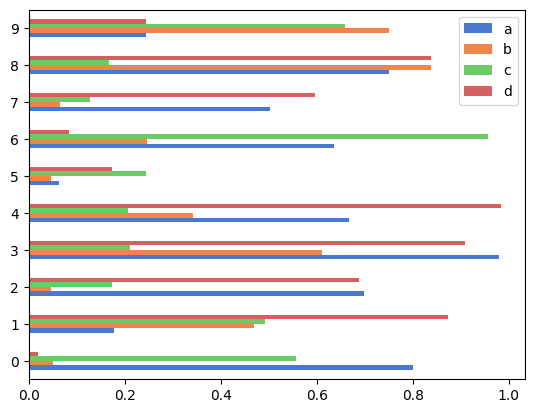

In [66]:
df= pd.DataFrame(np.random.rand(10,4),
                 columns= ['a', 'b', 'c', 'd'])
df.plot(kind='barh', grid=False,
        color= sns.color_palette('muted'))

## Pie Charts

(-1.1014641507237515,
 1.1308584711865424,
 -1.142472402309424,
 1.1020224953480677)

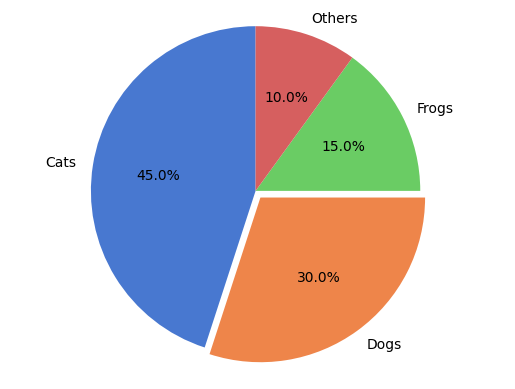

In [81]:
txtLabels= ['Cats', 'Dogs', 'Frogs', 'Others']
fractions= [45, 30, 15, 10]
offsets= (0, 0.05, 0, 0)

plt.pie(fractions, explode=offsets, labels= txtLabels,
        autopct= '%1.1f%%', shadow= False, startangle= 90,
        colors= sns.color_palette('muted'))
plt.axis('equal')